In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

In [2]:
match=pd.read_csv('matches.csv')
delv=pd.read_csv('deliveries.csv')
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
delv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [5]:
match.shape

(636, 18)

In [6]:
match.season.value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [7]:
print("No of matches played: ", match.shape[0])
print("No of seasons: ",(match.season.nunique()))

No of matches played:  636
No of seasons:  10


[]

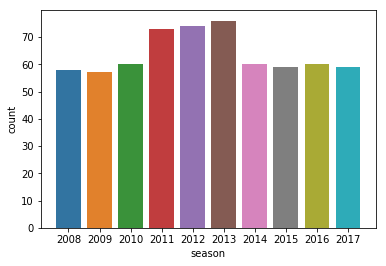

In [8]:
sns.countplot(x='season',data=match)
plt.plot()

[]

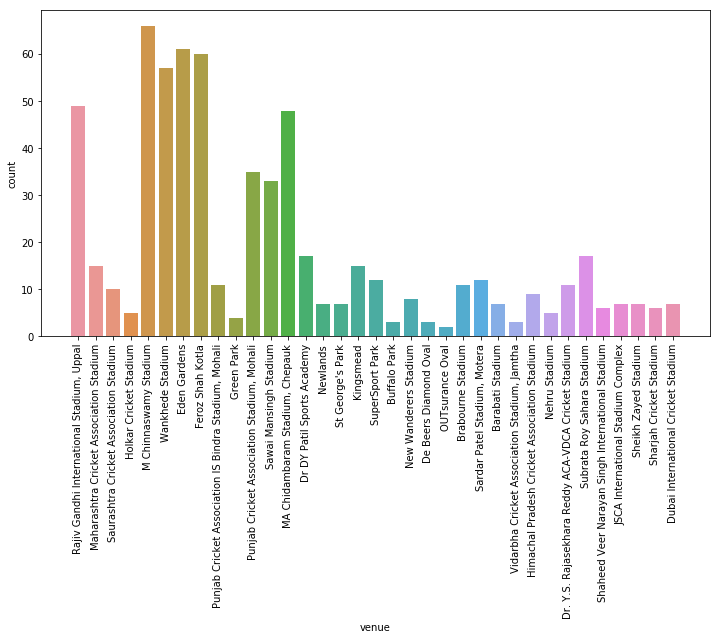

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue',data=match)
plt.xticks(rotation='vertical')
plt.plot()

In [10]:
temp_df = pd.melt(match, id_vars=['season'], value_vars=['team1', 'team2'])
temp_df 

,season,variable,value
0,2017,team1,Sunrisers Hyderabad
1,2017,team1,Mumbai Indians
2,2017,team1,Gujarat Lions
3,2017,team1,Rising Pune Supergiant
4,2017,team1,Royal Challengers Bangalore
5,2017,team1,Gujarat Lions
6,2017,team1,Kolkata Knight Riders
7,2017,team1,Royal Challengers Bangalore
8,2017,team1,Delhi Daredevils
9,2017,team1,Sunrisers Hyderabad


[]

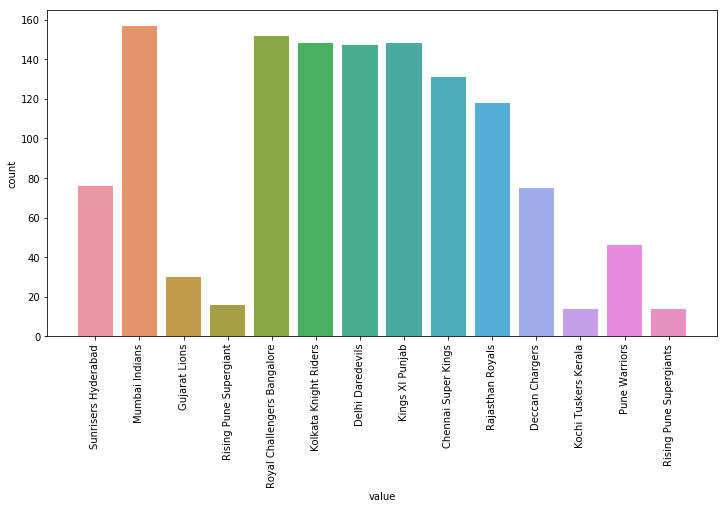

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='value',data=temp_df)
plt.xticks(rotation='vertical')
plt.plot()

[]

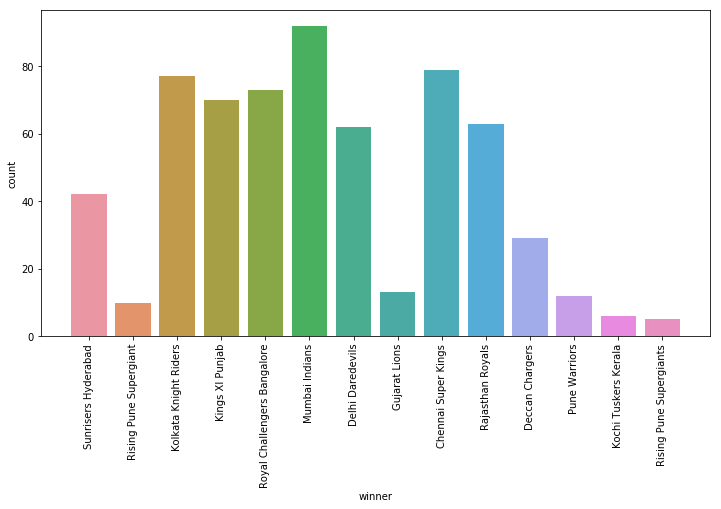

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner',data=match)
plt.xticks(rotation='vertical')
plt.plot()

[]

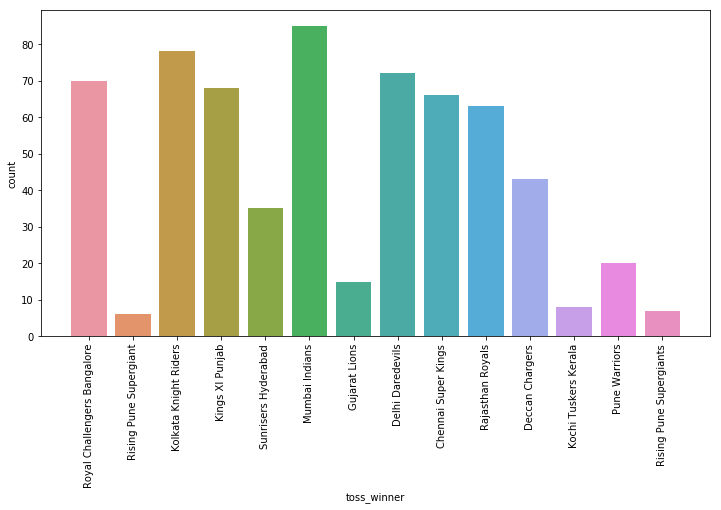

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner',data=match)
plt.xticks(rotation='vertical')
plt.plot()

In [14]:
z=match.toss_decision.value_counts()
z

field    363
bat      273
Name: toss_decision, dtype: int64

[]

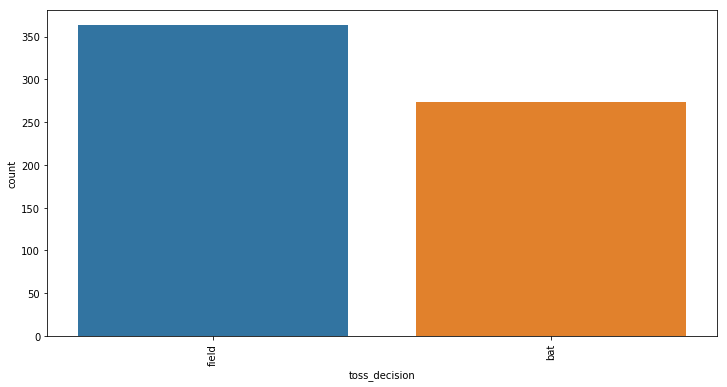

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_decision',data=match)
plt.xticks(rotation='vertical')
plt.plot()

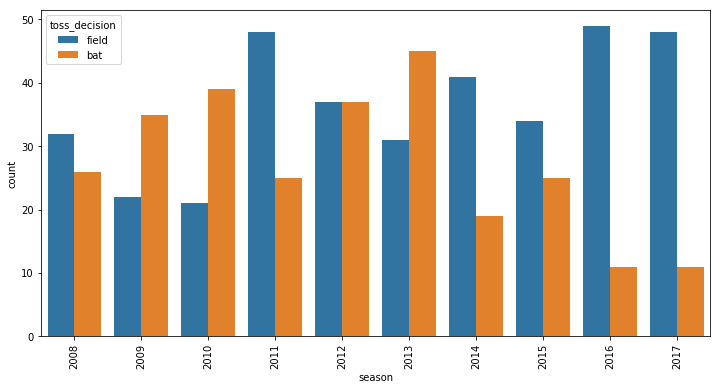

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=match)
plt.xticks(rotation='vertical')
plt.show()

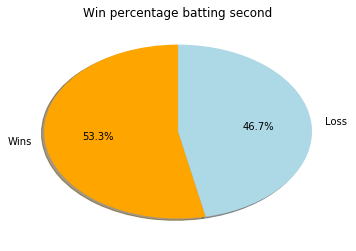

In [18]:
no_of_wins = (match.win_by_wickets>0).sum()
no_of_loss = (match.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(no_of_wins + no_of_loss)
sizes = [(no_of_wins/total)*100, (no_of_loss/total)*100]
colors = ['orange', 'lightblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

In [21]:
top_players=match.player_of_match.value_counts()[:10]
top_players


CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: player_of_match, dtype: int64

In [24]:
ump = pd.melt(match, id_vars=['season'], value_vars=['umpire1', 'umpire2'])
ump 

,season,variable,value
0,2017,umpire1,AY Dandekar
1,2017,umpire1,A Nand Kishore
2,2017,umpire1,Nitin Menon
3,2017,umpire1,AK Chaudhary
4,2017,umpire1,NaN
5,2017,umpire1,A Deshmukh
6,2017,umpire1,Nitin Menon
7,2017,umpire1,AK Chaudhary
8,2017,umpire1,AY Dandekar
9,2017,umpire1,Nitin Menon


In [34]:
x1=ump.value.value_counts()[:10]
x1

HDPK Dharmasena    87
S Ravi             85
AK Chaudhary       58
C Shamshuddin      56
SJA Taufel         55
M Erasmus          54
Asad Rauf          51
BR Doctrove        42
RE Koertzen        41
CK Nandan          41
Name: value, dtype: int64

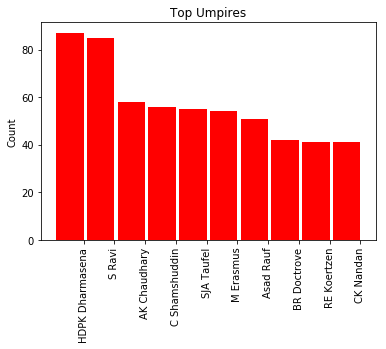

In [42]:
labels = np.array(x1.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(x1), width=width, color='r')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")

plt.show()

In [62]:
match['toss_winner_is_winner'] = 'no'
match['toss_winner_is_winner'].loc[match.toss_winner == match.winner] = 'yes'
match['toss_winner_is_winner'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


yes    325
no     311
Name: toss_winner_is_winner, dtype: int64

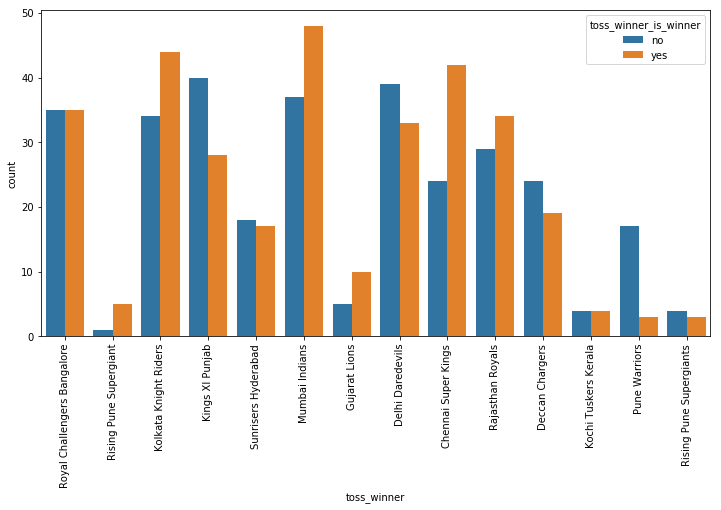

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=match)
plt.xticks(rotation='vertical')
plt.show()


It seems for Chennai Super Kings (CSK) winning the toss is an indication of winning the match with high probability.

On the other hand, Pune Warriors end up losing the matches more often when they won the toss

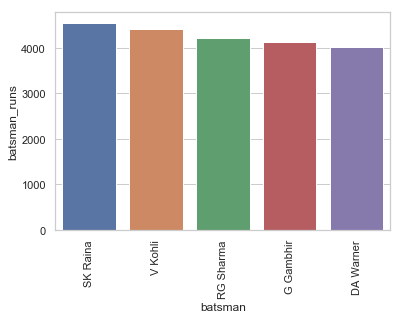

In [94]:
max_runs = delv.groupby('batsman')['batsman_runs'].agg('sum').reset_index()
max_runs1=temp_df.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
max_runs2=max_runs1.head(5)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'batsman', y = 'batsman_runs', data=max_runs2)
plt.xticks(rotation = 90)
plt.show()


Raina is leading the chart followed closely by Kohli. Warner is the top scorer among foreign players.


Now let us see the players with more number of boundaries in IPL.

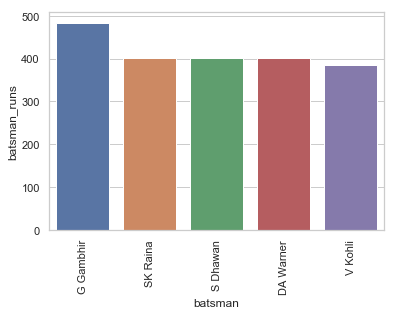

In [93]:
bound = delv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
bound1=bound.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
bound2=bound1.head(5)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'batsman', y = 'batsman_runs', data=bound2)
plt.xticks(rotation = 90)
plt.show()

Gambhir is leading the chart by a good margin

Now let us see the players with more number of sixes in IPL.

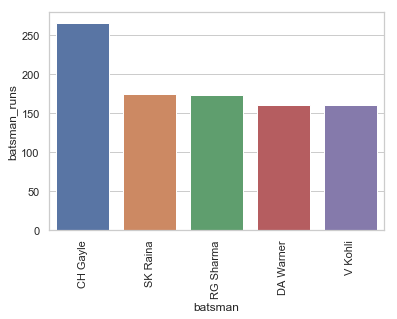

In [92]:
sixes = delv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
sixes1=sixes.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
sixes2=sixes1.head(5)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'batsman', y = 'batsman_runs', data=sixes2)
plt.xticks(rotation = 90)
plt.show()

  Gayle, the leader in the number of sixes by a very good margin

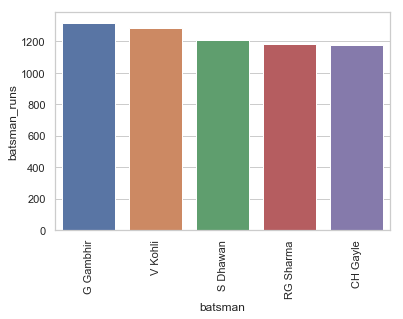

In [91]:
dot = delv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
dot1=dot.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
dot2=dot1.head(5)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'batsman', y = 'batsman_runs', data=dot2)
plt.xticks(rotation = 90)
plt.show()

Interesting to see that the same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.

# Bowler Analysis:

Now let us see the bowlers who has bowled most number of balls in IPL.

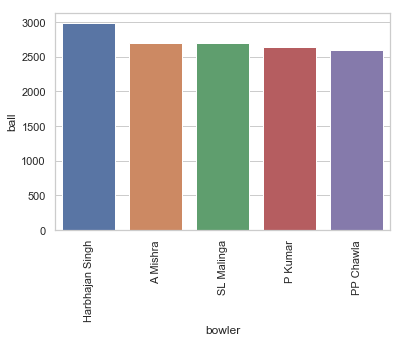

In [106]:
balls = delv.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
balls1=balls.head(5)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'bowler', y = 'ball', data=balls1)
plt.xticks(rotation = 90)
plt.show()


Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches.

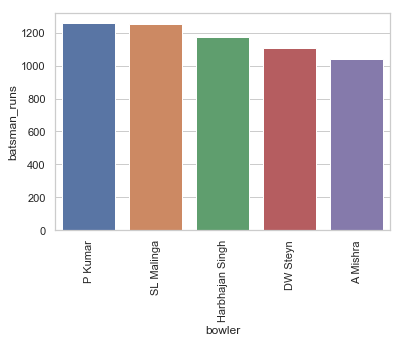

In [108]:
dots = delv.groupby('bowler')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
dots1=dots.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
dots2=dots1.head(5)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'bowler', y = 'batsman_runs', data=dots2)
plt.xticks(rotation = 90)
plt.show()

P Kumar is the the bowler who bowled most number of dot balls bowled in IPL matches.

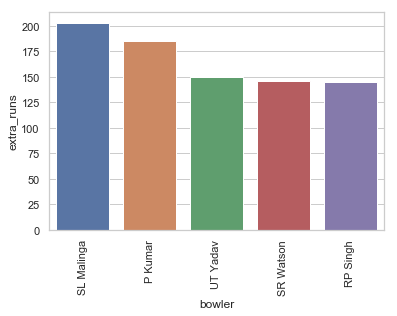

In [109]:
extras = delv.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index()
extras1=extras.sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
extras2=extras1.head(5)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'bowler', y = 'extra_runs', data=extras2)
plt.xticks(rotation = 90)
plt.show()

Malinga bowled most number of extra balls bowled in IPL matches.